In [2]:
%reload_ext autoreload
%autoreload 2

In [3]:
import numpy  as np
import pandas as pd
import tables as tb
import matplotlib.pyplot as plt
import modules_TFM as tfm

%matplotlib inline

from invisible_cities.io.pmaps_io import load_pmaps_as_df


In [4]:
input_file = '/Volumes/EXTERNAL_US/NEXT/Data/14675/pmaps/ldc1/run_14675_0000_ldc1_trg0.v2.1.0.20241114.Kr.irene.h5'

file_kdst = '/Volumes/EXTERNAL_US/NEXT/Data/14675/14675_merged.h5'
kdst = pd.read_hdf(file_kdst)

In [5]:
!ptdump -v $input_file:/PMAPS

/PMAPS (Group) ''
/PMAPS/S1 (Table(46732,)shuffle, zlib(4)) 'S1 Table'
  description := {
  "event": Int64Col(shape=(), dflt=0, pos=0),
  "peak": UInt8Col(shape=(), dflt=0, pos=1),
  "time": Float32Col(shape=(), dflt=0.0, pos=2),
  "bwidth": Float32Col(shape=(), dflt=0.0, pos=3),
  "ene": Float32Col(shape=(), dflt=0.0, pos=4)}
  byteorder := 'little'
  chunkshape := (3120,)
  autoindex := True
  colindexes := {
    "event": Index(6, mediumshuffle, zlib(1)).is_csi=False}
/PMAPS/S1Pmt (Table(2803920,)shuffle, zlib(4)) 'S1Pmt Table'
  description := {
  "event": Int64Col(shape=(), dflt=0, pos=0),
  "peak": UInt8Col(shape=(), dflt=0, pos=1),
  "npmt": UInt8Col(shape=(), dflt=0, pos=2),
  "ene": Float32Col(shape=(), dflt=0.0, pos=3)}
  byteorder := 'little'
  chunkshape := (4681,)
  autoindex := True
  colindexes := {
    "event": Index(6, mediumshuffle, zlib(1)).is_csi=False}
/PMAPS/S2 (Table(5714,)shuffle, zlib(4)) 'S2 Table'
  description := {
  "event": Int64Col(shape=(), dflt=0, pos=0)

### Data Selection

Loading the pmaps as pandas DataFrame and ask the events to be within the diffusion band

In [6]:
pmaps_s1 = []
pmaps_s2 = []

for ifile in range(1000):
    input_file = f'/Volumes/EXTERNAL_US/NEXT/Data/14675/pmaps/ldc1/run_14675_{ifile:04d}_ldc1_trg0.v2.1.0.20241114.Kr.irene.h5'
    print('Reading file', input_file)

    map_s1, map_s2, *_ = load_pmaps_as_df(input_file) 

    pmaps_s1.append(map_s1)
    pmaps_s2.append(map_s2)

    print('done')

data_s1 = pd.concat(pmaps_s1, ignore_index=True)
data_s2 = pd.concat(pmaps_s2, ignore_index=True)

pmaps_filtered_s1 = data_s1[data_s1["event"].isin(kdst.event)]
pmaps_filtered_s2 = data_s2[data_s2["event"].isin(kdst.event)]

Reading file /Volumes/EXTERNAL_US/NEXT/Data/14675/pmaps/ldc1/run_14675_0000_ldc1_trg0.v2.1.0.20241114.Kr.irene.h5
done
Reading file /Volumes/EXTERNAL_US/NEXT/Data/14675/pmaps/ldc1/run_14675_0001_ldc1_trg0.v2.1.0.20241114.Kr.irene.h5
done
Reading file /Volumes/EXTERNAL_US/NEXT/Data/14675/pmaps/ldc1/run_14675_0002_ldc1_trg0.v2.1.0.20241114.Kr.irene.h5
done
Reading file /Volumes/EXTERNAL_US/NEXT/Data/14675/pmaps/ldc1/run_14675_0003_ldc1_trg0.v2.1.0.20241114.Kr.irene.h5
done
Reading file /Volumes/EXTERNAL_US/NEXT/Data/14675/pmaps/ldc1/run_14675_0004_ldc1_trg0.v2.1.0.20241114.Kr.irene.h5
done
Reading file /Volumes/EXTERNAL_US/NEXT/Data/14675/pmaps/ldc1/run_14675_0005_ldc1_trg0.v2.1.0.20241114.Kr.irene.h5
done
Reading file /Volumes/EXTERNAL_US/NEXT/Data/14675/pmaps/ldc1/run_14675_0006_ldc1_trg0.v2.1.0.20241114.Kr.irene.h5
done
Reading file /Volumes/EXTERNAL_US/NEXT/Data/14675/pmaps/ldc1/run_14675_0007_ldc1_trg0.v2.1.0.20241114.Kr.irene.h5
done
Reading file /Volumes/EXTERNAL_US/NEXT/Data/1467

In [7]:
pmaps_filtered_s2 = pmaps_filtered_s2[pmaps_filtered_s2.time < 1670000]

In [8]:
times = []
energies = []

for event, group in pmaps_filtered_s2.groupby("event"):
    times.append(group.time.to_numpy() * 10**-3)  
    energies.append(group.ene.to_numpy())
   

Error on iteration 45
Error on iteration 620
Error on iteration 655
Error on iteration 902
Error on iteration 922
Error on iteration 1267
Error on iteration 1268
Error on iteration 1458
Error on iteration 1515
Error on iteration 1771
Error on iteration 1922
Error on iteration 2060
Error on iteration 2218
Error on iteration 2361
Error on iteration 2570
Error on iteration 2615
Error on iteration 3057
Error on iteration 3363


/Users/pablovazquez/Library/CloudStorage/OneDrive-UniversidadedeSantiagodeCompostela/Máster/TFM/modules_TFM.py:393: RuntimeWarning: invalid value encountered in sqrt
  uncertainty_mean.append(np.sqrt(pcov[1, 1]))
/Users/pablovazquez/Library/CloudStorage/OneDrive-UniversidadedeSantiagodeCompostela/Máster/TFM/modules_TFM.py:394: RuntimeWarning: invalid value encountered in sqrt
  uncertainty_sigma.append(np.sqrt(pcov[2, 2]))


Error on iteration 3571
Error on iteration 3584


/Users/pablovazquez/miniconda/envs/IC-3.8-2024-06-08/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Error on iteration 3827
Error on iteration 4293
Error on iteration 4737
Error on iteration 4777
Error on iteration 4894
Error on iteration 4907
Error on iteration 5333
Error on iteration 5420
Error on iteration 5509
Error on iteration 5872
Error on iteration 5918
Error on iteration 6113
Error on iteration 6439
Error on iteration 6552
Error on iteration 6781
Error on iteration 6984
Error on iteration 7387
Error on iteration 7396
Error on iteration 7485
Error on iteration 7561
Error on iteration 7603
Error on iteration 7727
Error on iteration 7793
Error on iteration 7905
Error on iteration 7957
Error on iteration 7969
Error on iteration 8101


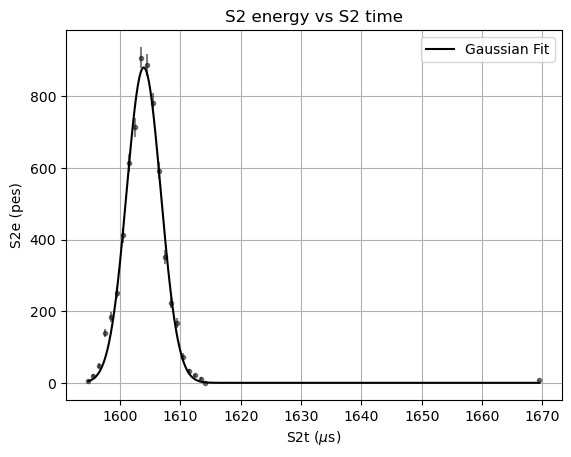

In [9]:
fit_params, mean_uncert, sigma_uncert, fails = tfm.pmap_gaussian(times, energies);

In [10]:
peak_energy = []
event_time  = []
event_width = []


for element in fit_params:
    peak_energy.append(element[0])
    event_time .append(element[1])
    event_width.append(element[2])

peak_energy = np.array(peak_energy)
event_time  = np.array(event_time )
event_width = np.array(event_width) 
    

In [11]:
kdst

,event,time,s1_peak,s2_peak,nS1,nS2,S1w,S1h,S1e,S1t,...,Nsipm,DT,Z,Zrms,X,Y,R,Phi,Xrms,Yrms
196,107,1.734609e+09,21,0,1,1,175.0,1.499119,6.136397,1544200.0,...,13,58.293251,58.293251,1.392103,-308.007566,-235.591057,387.778038,-2.488632,11.826533,11.709918
211,114,1.734609e+09,13,0,1,1,225.0,1.651226,7.230977,1215750.0,...,13,387.750397,387.750397,4.121779,-57.909602,-149.587092,160.405175,-1.940159,28.265645,34.274896
359,198,1.734609e+09,6,0,1,1,275.0,1.336479,7.874008,1457825.0,...,15,145.668259,145.668259,2.199228,179.519086,405.992119,443.910693,1.154470,14.888188,12.602237
388,233,1.734609e+09,6,0,1,1,275.0,1.864560,8.546017,469650.0,...,15,1139.834717,1139.834717,5.968433,138.545672,154.099738,207.223629,0.838498,49.949302,14.864375
438,261,1.734609e+09,4,0,1,1,300.0,1.914449,10.202315,638250.0,...,13,971.235291,971.235291,5.847420,141.821189,-264.700419,300.299120,-1.078936,13.702194,13.393387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5993549,3443848,1.734690e+09,13,0,1,1,250.0,0.706417,5.087567,1467400.0,...,13,135.076752,135.076752,2.076018,-213.575055,-87.784672,230.912218,-2.751618,12.082212,11.592501
5993563,3443855,1.734690e+09,11,0,1,1,250.0,1.934885,8.619365,1364600.0,...,13,239.874634,239.874634,2.606943,16.103950,-139.334547,140.262088,-1.455729,12.135278,12.274613
5993757,3443925,1.734690e+09,112,0,1,1,250.0,1.960486,7.902565,1480925.0,...,12,122.549255,122.549255,1.691326,-429.775555,-43.770616,431.998721,-3.040097,12.051754,11.010773
5993831,3443953,1.734690e+09,12,0,1,1,350.0,2.066933,14.850231,1009475.0,...,13,591.024048,591.024048,4.257305,433.629137,-71.883821,439.546940,-0.164279,14.671424,13.741927


In [12]:
times_s1 = kdst[kdst["event"].isin(pmaps_filtered_s2.event.unique())].drop_duplicates("event").S1t.to_numpy() * 10**-3

drift_time = event_time - times_s1

drift_time = np.array(drift_time)
s2w = np.array(event_width)


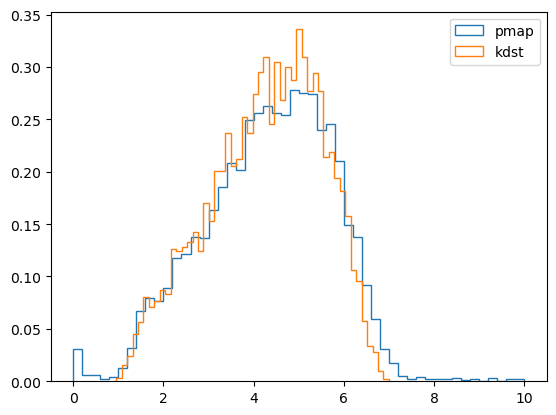

In [13]:
plt.hist(s2w, bins = 50, range = (0,10), histtype='step', density = True, label = 'pmap');
plt.hist(kdst[kdst["event"].isin(pmaps_filtered_s2.event.unique())].drop_duplicates("event").Zrms.to_numpy()
, bins = 50, histtype='step', density = True, label = 'kdst');
plt.legend();

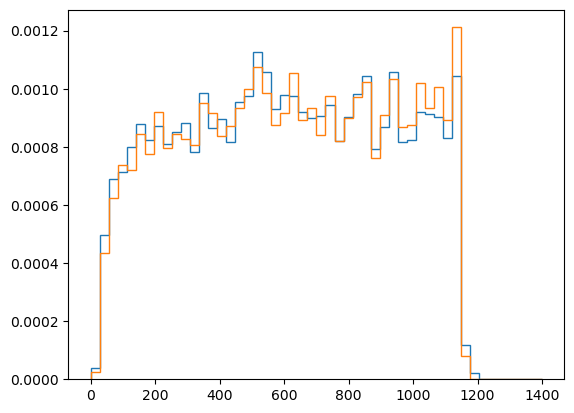

In [14]:
plt.hist(drift_time, bins = 50 ,range = (0, 1400), histtype= 'step', density =True);
plt.hist(kdst[kdst["event"].isin(pmaps_filtered_s2.event.unique())].drop_duplicates("event").DT.to_numpy(), bins = 50 ,range = (0, 1400), histtype= 'step', density = True);

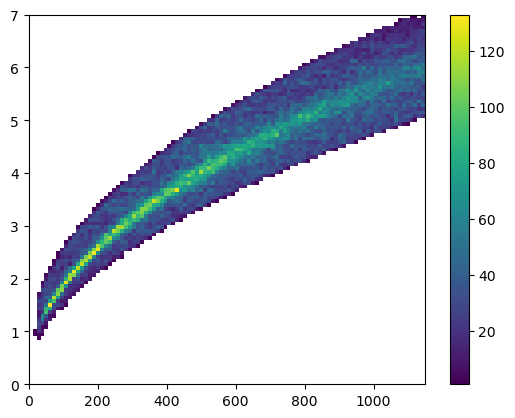

In [15]:
plt.hist2d(kdst.DT, kdst.Zrms, bins =100, range = [(0,1150), (0,7)], cmin = 1);
plt.colorbar();

In [16]:
pmaps_filtered_s2 = pmaps_filtered_s2.sort_values(by="event").reset_index(drop=True)
kdst_filtered = kdst[kdst["event"].isin(pmaps_filtered_s2.event.unique())].drop_duplicates("event").sort_values(by="event").reset_index(drop=True)

times_s1 = kdst_filtered.S1t.to_numpy() * 10**-3

In [17]:
events_fitted = pd.DataFrame({
    "event": pmaps_filtered_s2.event.unique(),  # Mantiene el orden de pmaps_filtered_s2
    "event_time": np.array([p[1] for p in fit_params]),  # Extrae la columna correcta
    "event_width": np.array([p[2] for p in fit_params])  # Extrae la anchura temporal
})

In [18]:
events_fitted = events_fitted.sort_values(by="event").reset_index(drop=True)

event_time = events_fitted.event_time.to_numpy()
event_width = events_fitted.event_width.to_numpy()

drift_time = event_time - times_s1


Text(0, 0.5, 'DT$_{rms}$ ($\\mu$s)')

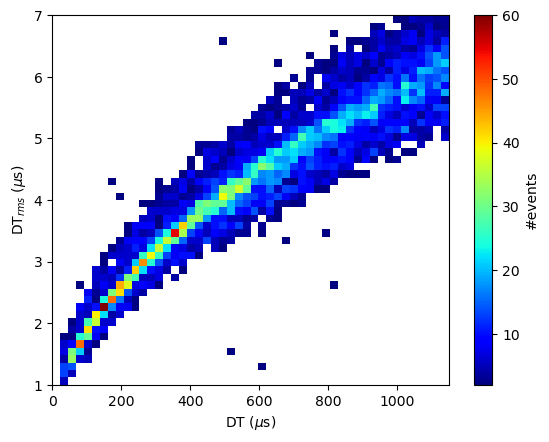

In [19]:
plt.hist2d(drift_time, event_width, bins = (50,50), range = [(0,1150), (1,7)], cmin = 2, cmap = 'jet');
plt.colorbar(label = '#events');
plt.xlabel(r'DT ($\mu$s)')
plt.ylabel(r'DT$_{rms}$ ($\mu$s)')

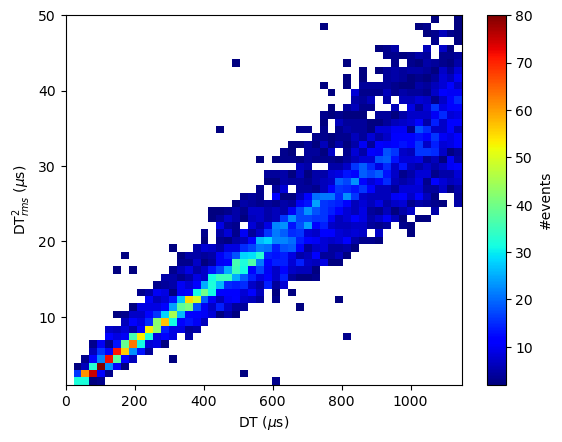

In [20]:
plt.hist2d(drift_time, event_width**2, bins = (50,50), range = [(0,1150), (1,50)], cmin = 2, cmap = 'jet');
plt.colorbar(label = '#events');
plt.xlabel(r'DT ($\mu$s)');
plt.ylabel(r'DT$^2_{rms}$ ($\mu$s)');

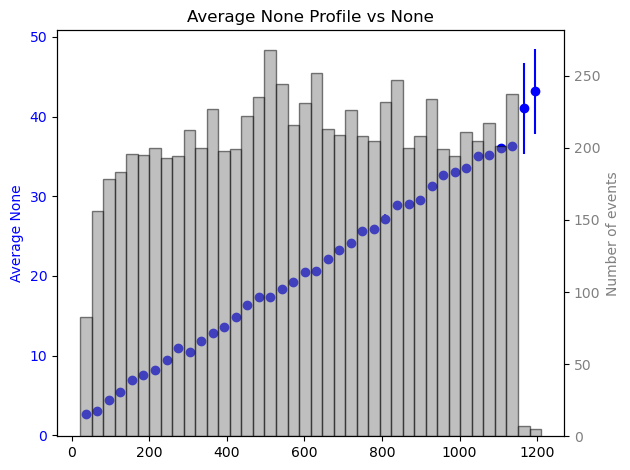

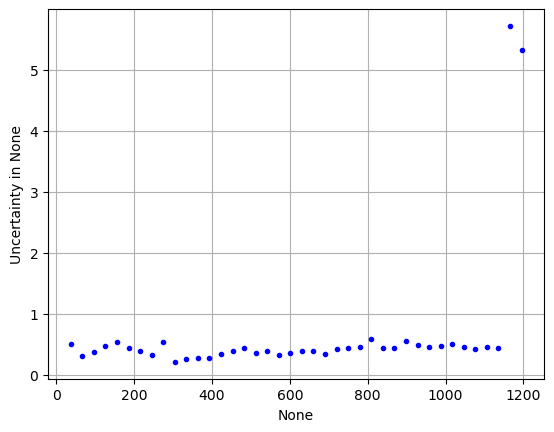

In [21]:
drift = []
width = []

for d,w in zip(drift_time, event_width):
    if d < 1400 and w <9:
        drift.append(d)
        width.append(w)

drift_time = np.array(drift)
event_width = np.array(width)

DT_prof, Z_rms_mean_sq, Z_rms_mean_sq_rms = tfm.profiles(drift_time, event_width ** 2 , threshold = 5, n_bins = 40, plot = True, normalize = True);

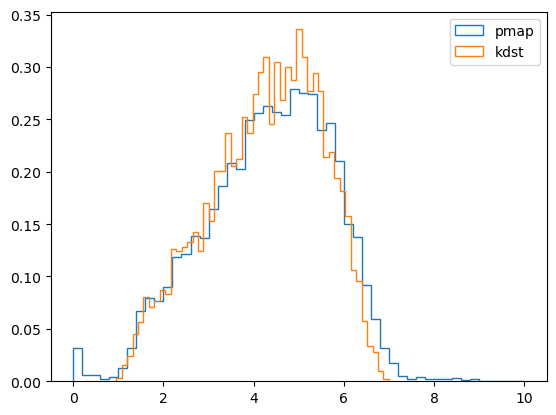

In [22]:
plt.hist(event_width, bins = 50, range = (0,10), histtype='step', density = True, label = 'pmap');
plt.hist(kdst[kdst["event"].isin(pmaps_filtered_s2.event.unique())].drop_duplicates("event").Zrms.to_numpy()
, bins = 50, histtype='step', density = True, label = 'kdst');
plt.legend();

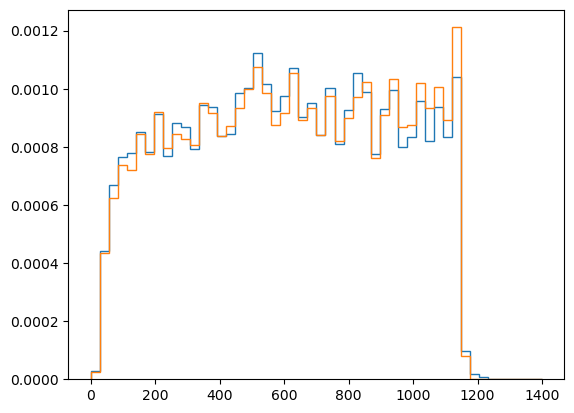

In [23]:
plt.hist(drift_time, bins = 50 ,range = (0, 1400), histtype= 'step', density =True);
plt.hist(kdst[kdst["event"].isin(pmaps_filtered_s2.event.unique())].drop_duplicates("event").DT.to_numpy(), bins = 50 ,range = (0, 1400), histtype= 'step', density = True);

In [24]:
def recta(x, a, b):
    return a*x+b

drift_velocity=0.865 # mm/ mu s !!!!!
profile_data_L=tfm.Data1d(DT_prof, Z_rms_mean_sq, Z_rms_mean_sq_rms)

profile_data_L.fit(recta, p0=[0,0]);

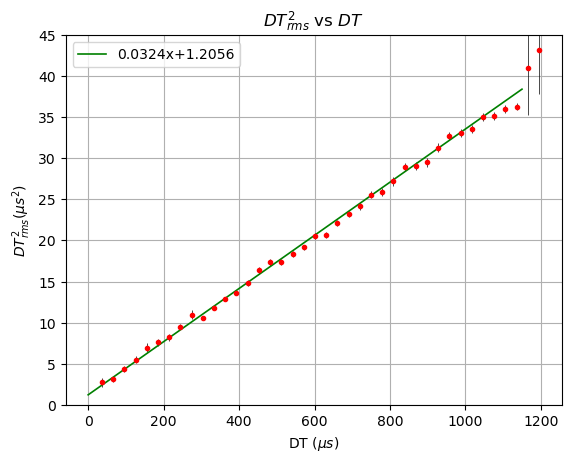

In [25]:
profile_data_L.plot()
plt.plot(np.linspace(0,1150,1000), recta(np.linspace(0,1150,1000), profile_data_L.fit(recta, p0=[0,0])[0][0],
                                        profile_data_L.fit(recta, p0=[0,0])[0][1]), linewidth=1.2, color='green',
                                        label=f'{np.round(profile_data_L.fit(recta, p0=[0,0])[0][0],4)}x+{np.round(profile_data_L.fit(recta, p0=[0,0])[0][1],4)}')
plt.xlabel(r'DT ($\mu s)$')
plt.ylabel(r'$DT_{rms}^2 (\mu s^2)$')
plt.ylim(0,45)
plt.title(r'$DT_{rms}^2$ vs $DT$ ')
plt.legend(loc='upper left')
plt.grid(True)

In [26]:
slope_L=profile_data_L.fit(recta,p0=(0,0))[0][0]
incert_slope_L=np.sqrt(profile_data_L.fit(recta,p0=(0,0))[1][0,0])

print(slope_L)
print(incert_slope_L)

0.0323598637918276
0.0003849250500449232


In [1]:
print('La presion reducida es:',4/58.42)
print(r'La temperatura reducida es, suponiendo T=25C:', (273.15+25)/289.733)

print('El factor de compresibilidad es entonces:', 0.971)

P=4
T=25
Z=0.971

La presion reducida es: 0.06846970215679561
La temperatura reducida es, suponiendo T=25C: 1.029050884780125
El factor de compresibilidad es entonces: 0.971


In [2]:
slope = slope_L

DL=slope*drift_velocity**2/2
DLstar=tfm.diffusion_coef(293.15, 0.971, drift_velocity, 4, DL)/2
iDL = tfm.uncert_Dl(incert_slope_L, 0.00016, drift_velocity, slope)

iDLstar = tfm.uncert_Dlstar(iDL, 0.00016, drift_velocity, DL, T, P, Z)
print(f'{DLstar} +- {iDLstar}')

print()
print(f'A campo reducido {114.45/3.96}')

NameError: name 'slope_L' is not defined